In [18]:
!pip install curl_cffi

  Using cached curl_cffi-0.11.1-cp39-abi3-macosx_11_0_arm64.whl.metadata (14 kB)
Using cached curl_cffi-0.11.1-cp39-abi3-macosx_11_0_arm64.whl (3.0 MB)


In [422]:
!pip install ta

In [10]:
!pip install yfinance

In [423]:
!pip install optuna

In [19]:
from curl_cffi import requests
session = requests.Session(impersonate="chrome")
ticker = yf.Ticker('...', session=session)

In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor, plot_importance,XGBClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,TimeSeriesSplit,RandomizedSearchCV
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression,RFECV
import yfinance as yf
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,r2_score,classification_report,confusion_matrix,precision_recall_curve
import ta
from ta.trend import MACD
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
from sklearn.neighbors import KNeighborsClassifier
import optuna
from scipy.stats import randint, uniform


# Coca Cola Dataset

## Dataset Information

All the currency of the dataset is in USD

Row: 15930 rows

columns: 7

Columns:
 - **date:** Date of trading
 - **open:** Opening price of the day
 - **high:** Highest price of the day
 - **low:** Lowest price of the day
 - **close:** Closing price of the day
 - **adj_close:** Adjusted closing price (accounts for splits/dividends)
 - **volume:** Total shares traded on the day 

In [425]:
cola_stock = pd.read_csv("/Users/julius/Personal/Personal_Project/Coca_cola_Project/Analysis_of_Coca_Cola_Stock_Market/Dataset/KO_1919-09-06_2025-04-17.csv")

In [327]:
cola_stock.dtypes

date          object
open         float64
high         float64
low          float64
close        float64
adj_close    float64
volume         int64
dtype: object

In [328]:
#Changing the data type of the date into datetime 
cola_stock['date'] = pd.to_datetime(cola_stock['date'], utc = True)

In [329]:
cola_stock.dtypes


date         datetime64[ns, UTC]
open                     float64
high                     float64
low                      float64
close                    float64
adj_close                float64
volume                     int64
dtype: object

In [330]:
cola_stock

,date,open,high,low,close,adj_close,volume
0,1962-01-02 05:00:00+00:00,0.263021,0.270182,0.263021,0.263021,0.046041,806400
1,1962-01-03 05:00:00+00:00,0.259115,0.259115,0.253255,0.257161,0.045016,1574400
2,1962-01-04 05:00:00+00:00,0.257813,0.261068,0.257813,0.259115,0.045358,844800
3,1962-01-05 05:00:00+00:00,0.259115,0.262370,0.252604,0.253255,0.044332,1420800
4,1962-01-08 05:00:00+00:00,0.251302,0.251302,0.245768,0.250651,0.043876,2035200
...,...,...,...,...,...,...,...
15925,2025-04-10 04:00:00+00:00,70.190002,71.209999,68.980003,70.760002,70.760002,22450200
15926,2025-04-11 04:00:00+00:00,70.910004,71.849998,70.540001,71.430000,71.430000,19988200
15927,2025-04-14 04:00:00+00:00,71.300003,72.660004,70.930000,72.449997,72.449997,13930200
15928,2025-04-15 04:00:00+00:00,72.620003,72.629997,71.720001,71.860001,71.860001,14965500


In [331]:
#changing the data type of date column by removing the time
cola_stock['date'] = cola_stock['date'].dt.date

In [332]:
cola_stock['date'] = pd.to_datetime(cola_stock['date'])
cola_stock

,date,open,high,low,close,adj_close,volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.046041,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.045016,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.045358,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.044332,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.043876,2035200
...,...,...,...,...,...,...,...
15925,2025-04-10,70.190002,71.209999,68.980003,70.760002,70.760002,22450200
15926,2025-04-11,70.910004,71.849998,70.540001,71.430000,71.430000,19988200
15927,2025-04-14,71.300003,72.660004,70.930000,72.449997,72.449997,13930200
15928,2025-04-15,72.620003,72.629997,71.720001,71.860001,71.860001,14965500


# Other Brands

In [28]:
#for sp500 stock I will be importing it from Yahoo Finance
pepsi_stock = yf.download('PEP', start = '1965-01-02', end= '2025-04-04',auto_adjust=False)
pepsi_stock = pepsi_stock.to_csv("/Users/julius/Personal/Personal_Project/Coca_cola_Project/Analysis_of_Coca_Cola_Stock_Market/Dataset/pepsi_1962.csv")

[*********************100%***********************]  1 of 1 completed


In [29]:
pepsi_stock = pd.read_csv("/Users/julius/Personal/Personal_Project/Coca_cola_Project/Analysis_of_Coca_Cola_Stock_Market/Dataset/pepsi_1962.csv", skiprows=2)

In [30]:
pepsi_stock

,Date,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1972-06-01,0.389579,1.601852,1.601852,1.583333,0.000000,318600
1,1972-06-02,0.388453,1.597222,1.618056,1.597222,1.601852,140400
2,1972-06-05,0.383936,1.574074,1.599537,1.543981,1.597222,469800
3,1972-06-06,0.380548,1.560185,1.560185,1.555556,1.560185,140400
4,1972-06-07,0.378290,1.550926,1.562500,1.546296,1.560185,178200
...,...,...,...,...,...,...,...
13317,2025-03-28,149.270004,149.270004,151.380005,147.110001,150.440002,8550900
13318,2025-03-31,149.940002,149.940002,152.589996,149.750000,150.199997,9985700
13319,2025-04-01,149.669998,149.669998,150.789993,148.669998,150.490005,6072800
13320,2025-04-02,149.119995,149.119995,150.500000,148.070007,150.229996,5866200


In [32]:
pepsi_stock.columns = ['date','adj_close','close','high','low','open','volume']
pepsi_stock['date'] = pd.to_datetime(pepsi_stock['date'])
pepsi_stock.set_index('date', inplace=True)

In [33]:
pepsi_stock = pepsi_stock.reset_index()

In [34]:
pepsi_stock = pepsi_stock[['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']]


In [35]:
pepsi_stock

,date,open,high,low,close,adj_close,volume
0,1972-06-01,0.000000,1.601852,1.583333,1.601852,0.389579,318600
1,1972-06-02,1.601852,1.618056,1.597222,1.597222,0.388453,140400
2,1972-06-05,1.597222,1.599537,1.543981,1.574074,0.383936,469800
3,1972-06-06,1.560185,1.560185,1.555556,1.560185,0.380548,140400
4,1972-06-07,1.560185,1.562500,1.546296,1.550926,0.378290,178200
...,...,...,...,...,...,...,...
13317,2025-03-28,150.440002,151.380005,147.110001,149.270004,149.270004,8550900
13318,2025-03-31,150.199997,152.589996,149.750000,149.940002,149.940002,9985700
13319,2025-04-01,150.490005,150.789993,148.669998,149.669998,149.669998,6072800
13320,2025-04-02,150.229996,150.500000,148.070007,149.119995,149.119995,5866200


In [37]:
#KDP stock I will be importing it from Yahoo Finance
kdp_stock = yf.download('KDP', start = '1993-09-21', end= '2025-04-04',auto_adjust=False)
kdp_stock = kdp_stock.to_csv("/Users/julius/Personal/Personal_Project/Coca_cola_Project/Analysis_of_Coca_Cola_Stock_Market/Dataset/kdp_stock.csv")

[*********************100%***********************]  1 of 1 completed


In [38]:
kdp_stock = pd.read_csv("/Users/julius/Personal/Personal_Project/Coca_cola_Project/Analysis_of_Coca_Cola_Stock_Market/Dataset/kdp_stock.csv", skiprows=2)

In [39]:
kdp_stock.columns = ['date','adj_close','close','high','low','open','volume']
kdp_stock['date'] = pd.to_datetime(kdp_stock['date'])
kdp_stock.set_index('date', inplace=True)

In [41]:
kdp_stock = kdp_stock.reset_index()
kdp_stock = kdp_stock[['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']]

In [58]:
kdp_stock

,date,open,high,low,close,adj_close,volume
0,2008-05-07,25.200001,25.799999,24.799999,25.500000,2.786319,38943400
1,2008-05-08,25.580000,25.830000,24.740000,25.400000,2.775391,12468400
2,2008-05-09,25.100000,25.400000,24.940001,25.240000,2.757910,9747000
3,2008-05-12,25.110001,26.850000,25.100000,25.570000,2.793968,7921800
4,2008-05-13,25.379999,25.920000,25.200001,25.900000,2.830026,4518800
...,...,...,...,...,...,...,...
4250,2025-03-28,34.090000,34.270000,33.450001,33.740002,33.740002,17025400
4251,2025-03-31,33.959999,34.369999,33.830002,34.220001,34.220001,14302200
4252,2025-04-01,35.000000,35.169998,34.380001,34.970001,34.970001,13994600
4253,2025-04-02,35.049999,35.209999,34.580002,35.139999,35.139999,14860700


In [43]:
#for sp500 stock I will be importing it from Yahoo Finance
monster_stock = yf.download('MNST', start = '1965-01-02', end= '2025-04-04',auto_adjust=False)
monster_stock = monster_stock.to_csv("/Users/julius/Personal/Personal_Project/Coca_cola_Project/Analysis_of_Coca_Cola_Stock_Market/Dataset/monster_stock.csv")

[*********************100%***********************]  1 of 1 completed


In [44]:
monster_stock = pd.read_csv("/Users/julius/Personal/Personal_Project/Coca_cola_Project/Analysis_of_Coca_Cola_Stock_Market/Dataset/monster_stock.csv", skiprows=2)

In [48]:
monster_stock.columns = ['date','adj_close','close','high','low','open','volume']
monster_stock['date'] = pd.to_datetime(monster_stock['date'])
monster_stock.set_index('date', inplace=True)


ValueError: Length mismatch: Expected axis has 6 elements, new values have 7 elements

In [51]:
monster_stock = monster_stock.reset_index()
monster_stock = monster_stock[['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']]

In [52]:
monster_stock

,date,open,high,low,close,adj_close,volume
0,1985-12-09,0.000000,0.113932,0.081380,0.081380,0.066585,780288
1,1985-12-10,0.000000,0.113932,0.081380,0.081380,0.066585,117888
2,1985-12-11,0.000000,0.113932,0.081380,0.081380,0.066585,1632384
3,1985-12-12,0.000000,0.113932,0.081380,0.081380,0.066585,1357248
4,1985-12-13,0.000000,0.113932,0.081380,0.081380,0.066585,663936
...,...,...,...,...,...,...,...
9902,2025-03-28,58.860001,59.000000,57.470001,57.860001,57.860001,4464800
9903,2025-03-31,57.939999,58.889999,57.939999,58.520000,58.520000,5588000
9904,2025-04-01,58.500000,59.070000,58.299999,59.040001,59.040001,5035500
9905,2025-04-02,59.049999,59.419998,58.610001,59.360001,59.360001,4632800


In [53]:
#for sp500 stock I will be importing it from Yahoo Finance
sp_500 = yf.download('^GSPC', start = '1965-01-02', end= '2025-04-04',auto_adjust=False)
sp_500 = sp_500.to_csv("/Users/julius/Personal/Personal_Project/Coca_cola_Project/Analysis_of_Coca_Cola_Stock_Market/Dataset/sp_500.csv")

[*********************100%***********************]  1 of 1 completed


In [54]:
sp_500 = pd.read_csv("/Users/julius/Personal/Personal_Project/Coca_cola_Project/Analysis_of_Coca_Cola_Stock_Market/Dataset/sp_500.csv", skiprows=2)

In [55]:
sp_500.columns = ['date','adj_close','close','high','low','open','volume']
sp_500['date'] = pd.to_datetime(sp_500['date'])
sp_500.set_index('date', inplace=True)


In [56]:
sp_500 = sp_500.reset_index()
sp_500 = sp_500[['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']]

In [57]:
sp_500

,date,open,high,low,close,adj_close,volume
0,1965-01-04,0.000000,85.150002,83.769997,84.230003,84.230003,3930000
1,1965-01-05,0.000000,85.019997,84.019997,84.629997,84.629997,4110000
2,1965-01-06,0.000000,85.379997,84.449997,84.889999,84.889999,4850000
3,1965-01-07,0.000000,85.620003,84.660004,85.260002,85.260002,5080000
4,1965-01-08,0.000000,85.839996,84.910004,85.370003,85.370003,5340000
...,...,...,...,...,...,...,...
15160,2025-03-28,5679.200195,5685.890137,5572.419922,5580.939941,5580.939941,4513330000
15161,2025-03-31,5527.910156,5627.560059,5488.729980,5611.850098,5611.850098,5257250000
15162,2025-04-01,5597.529785,5650.569824,5558.520020,5633.069824,5633.069824,4434500000
15163,2025-04-02,5580.759766,5695.310059,5571.479980,5670.970215,5670.970215,4243830000


# EDA Exploratory Data Analysis

### Checking the content of the dataset and looking for missing values,outlier and skewness

In [333]:
cola_stock.shape

(15930, 7)

In [334]:
cola_stock.isnull().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

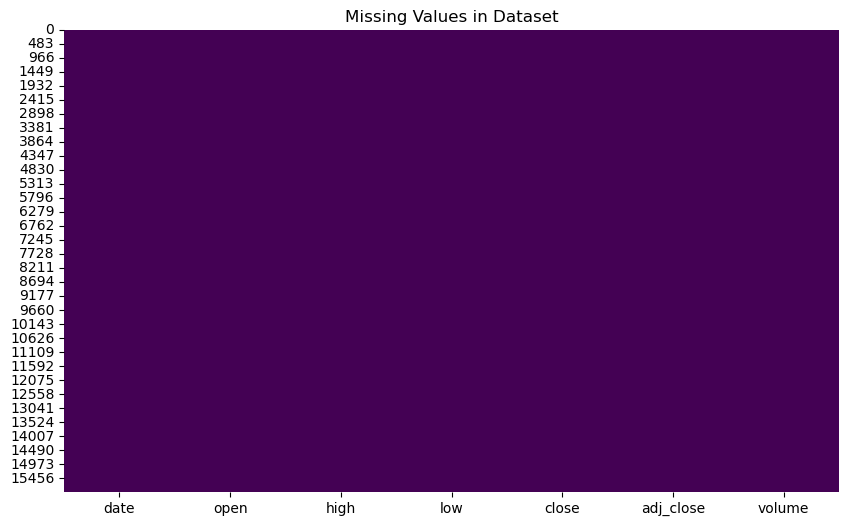

In [335]:
# Heatmap of missing values
plt.figure(figsize=(10,6))
sns.heatmap(cola_stock.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()

This shows that there are no missing values in the dataframe

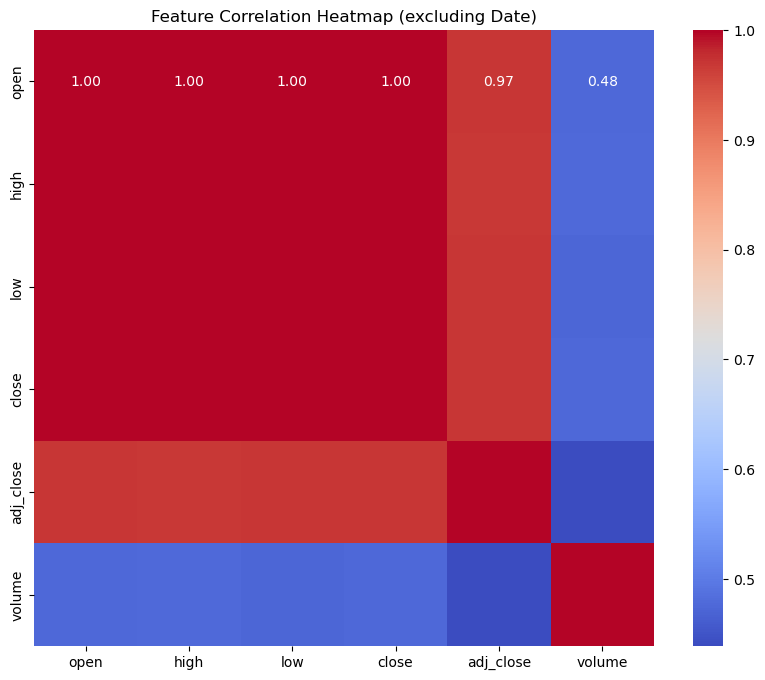

In [336]:
#for correlation matrix I will be dropping datetime since its not a float
corr_matrix = cola_stock.drop(columns=['date']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap (excluding Date)')
plt.show()

In [337]:
#extracting the date to seperate collumns
cola_stock['year'] = cola_stock['date'].dt.year
cola_stock['month'] = cola_stock['date'].dt.month
cola_stock['day'] = cola_stock['date'].dt.day
cola_stock

,date,open,high,low,close,adj_close,volume,year,month,day
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.046041,806400,1962,1,2
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.045016,1574400,1962,1,3
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.045358,844800,1962,1,4
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.044332,1420800,1962,1,5
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.043876,2035200,1962,1,8
...,...,...,...,...,...,...,...,...,...,...
15925,2025-04-10,70.190002,71.209999,68.980003,70.760002,70.760002,22450200,2025,4,10
15926,2025-04-11,70.910004,71.849998,70.540001,71.430000,71.430000,19988200,2025,4,11
15927,2025-04-14,71.300003,72.660004,70.930000,72.449997,72.449997,13930200,2025,4,14
15928,2025-04-15,72.620003,72.629997,71.720001,71.860001,71.860001,14965500,2025,4,15


In [338]:
cola_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15930 entries, 0 to 15929
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       15930 non-null  datetime64[ns]
 1   open       15930 non-null  float64       
 2   high       15930 non-null  float64       
 3   low        15930 non-null  float64       
 4   close      15930 non-null  float64       
 5   adj_close  15930 non-null  float64       
 6   volume     15930 non-null  int64         
 7   year       15930 non-null  int32         
 8   month      15930 non-null  int32         
 9   day        15930 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(3), int64(1)
memory usage: 1.0 MB


In [339]:
cola_stock.describe()

,date,open,high,low,close,adj_close,volume,year,month,day
count,15930,15930.000000,15930.000000,15930.000000,15930.000000,15930.000000,1.593000e+04,15930.000000,15930.000000,15930.000000
mean,1993-08-31 02:24:48.813559296,18.476707,18.625024,18.325447,18.481559,12.860345,9.340502e+06,1993.166416,6.508788,15.734777
min,1962-01-02 00:00:00,0.192708,0.193359,0.182292,0.192057,0.034086,7.680000e+04,1962.000000,1.000000,1.000000
25%,1977-11-23 12:00:00,0.888021,0.895833,0.880208,0.888021,0.223946,3.120000e+06,1977.000000,4.000000,8.000000
50%,1993-08-25 12:00:00,10.531250,10.640625,10.468750,10.531250,4.828978,8.094800e+06,1993.000000,7.000000,16.000000
75%,2009-06-17 18:00:00,32.000000,32.375000,31.625000,32.000000,17.417218,1.330348e+07,2009.000000,10.000000,23.000000
max,2025-04-16 00:00:00,73.300003,73.949997,72.320000,73.180000,73.180000,1.241690e+08,2025.000000,12.000000,31.000000
std,NaN,19.461582,19.601645,19.317982,19.464715,16.691945,7.958782e+06,18.247033,3.437169,8.742723


In [340]:
#checking for daily returns
cola_stock['returns'] = cola_stock['adj_close'].pct_change()
cola_stock

,date,open,high,low,close,adj_close,volume,year,month,day,returns
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.046041,806400,1962,1,2,NaN
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.045016,1574400,1962,1,3,-0.022280
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.045358,844800,1962,1,4,0.007598
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.044332,1420800,1962,1,5,-0.022615
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.043876,2035200,1962,1,8,-0.010283
...,...,...,...,...,...,...,...,...,...,...,...
15925,2025-04-10,70.190002,71.209999,68.980003,70.760002,70.760002,22450200,2025,4,10,0.011580
15926,2025-04-11,70.910004,71.849998,70.540001,71.430000,71.430000,19988200,2025,4,11,0.009469
15927,2025-04-14,71.300003,72.660004,70.930000,72.449997,72.449997,13930200,2025,4,14,0.014280
15928,2025-04-15,72.620003,72.629997,71.720001,71.860001,71.860001,14965500,2025,4,15,-0.008143


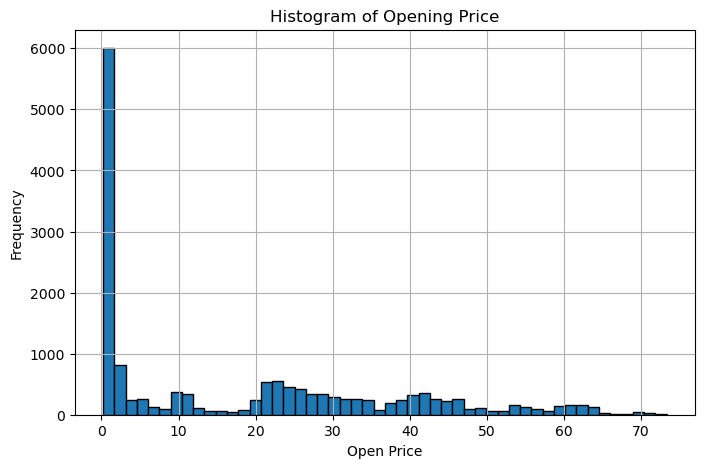

In [341]:
cola_stock['open'].hist(bins=50, figsize=(8,5), edgecolor = 'black')
plt.title("Histogram of Opening Price")
plt.xlabel("Open Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show() 

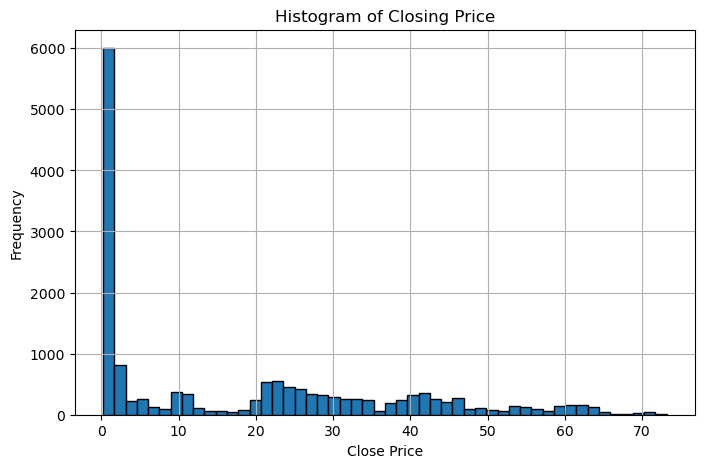

In [342]:
cola_stock['close'].hist(bins=50, figsize=(8,5), edgecolor = 'black')
plt.title("Histogram of Closing Price")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show() 

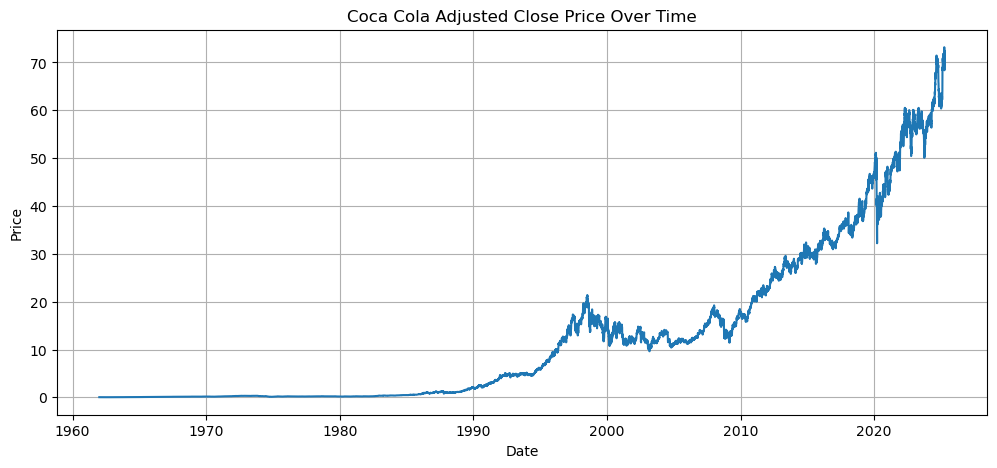

In [343]:
# Line plot of adjusted close
plt.figure(figsize=(12, 5))
plt.plot(cola_stock['date'], cola_stock['adj_close'])
plt.title("Coca Cola Adjusted Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

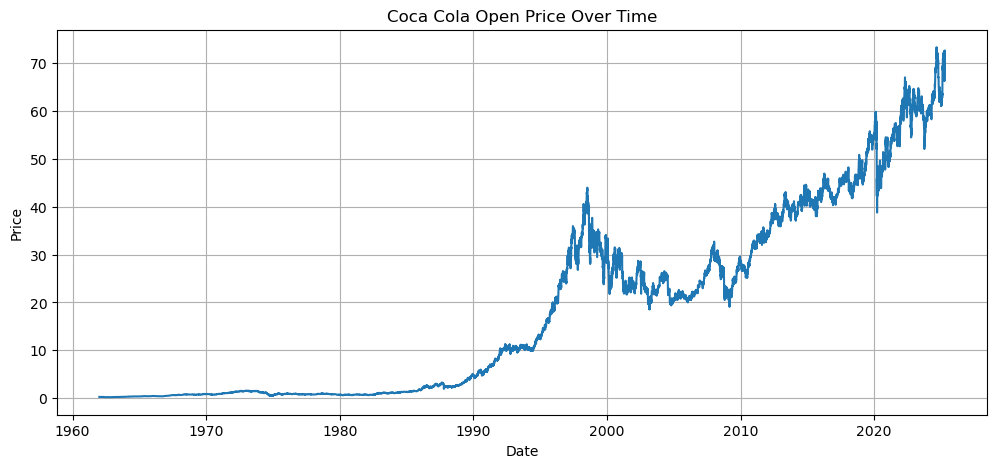

In [344]:
# Line plot of open price
plt.figure(figsize=(12, 5))
plt.plot(cola_stock['date'], cola_stock['open'])
plt.title("Coca Cola Open Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

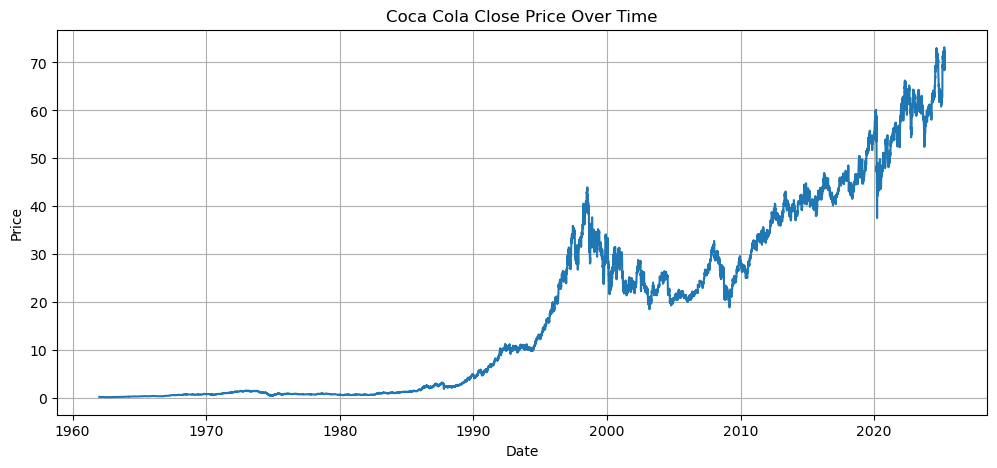

In [345]:
# Line plot of open price
plt.figure(figsize=(12, 5))
plt.plot(cola_stock['date'], cola_stock['close'])
plt.title("Coca Cola Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

From the plot above we can see that the close price of coca cola stock price or KO was stagnant in the 1960s it atart to rise in the year 1990 where there is a huge spike in close price by the year 2000 the price have a slight decrease where it fluctuates until 2010 where it once again spikes up with slight fluctuations and reach its peak in 2025

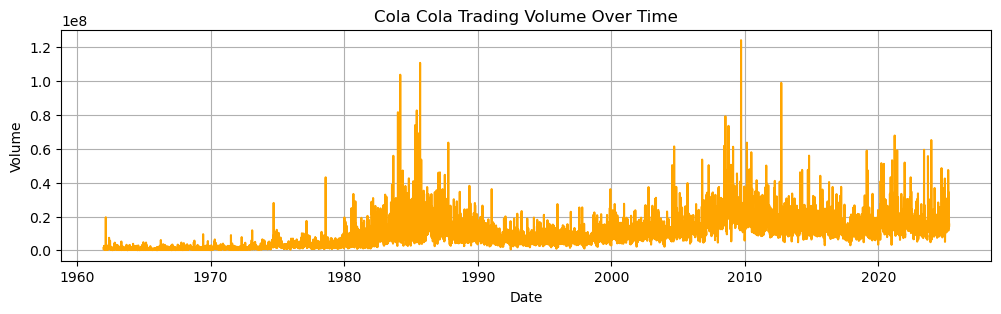

In [346]:
# Volume over time
plt.figure(figsize=(12, 3))
plt.plot(cola_stock['date'], cola_stock['volume'], color='orange')
plt.title("Cola Cola Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)
plt.show()


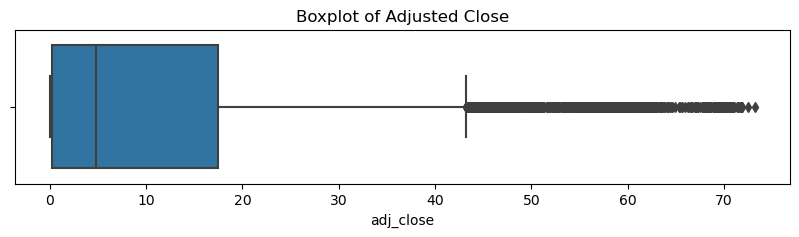

In [347]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=cola_stock['adj_close'])
plt.title("Boxplot of Adjusted Close")
plt.show()

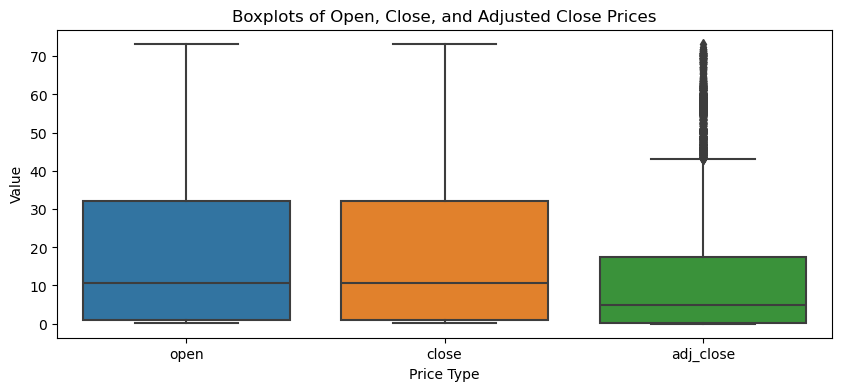

In [348]:

# Select the columns you want to plot
columns_to_plot = ['open', 'close', 'adj_close']
cola_subset = cola_stock[columns_to_plot]

# Reshape the DataFrame to long format
melted = pd.melt(cola_subset, var_name='Price Type', value_name='Value')

# Plot
plt.figure(figsize=(10, 4))
sns.boxplot(x='Price Type', y='Value', data=melted)
plt.title("Boxplots of Open, Close, and Adjusted Close Prices")
plt.show()

In [349]:
cola_stock.dtypes

date         datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
adj_close           float64
volume                int64
year                  int32
month                 int32
day                   int32
returns             float64
dtype: object

<Axes: title={'center': 'Drawdowns over time'}>

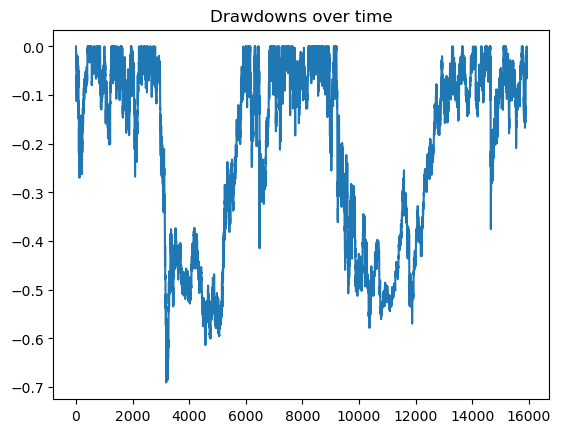

In [350]:
cola_stock['Cumulative_Max'] = cola_stock['close'].cummax()
cola_stock['Drawdown'] = (cola_stock['close'] - cola_stock['Cumulative_Max']) / cola_stock['Cumulative_Max']

cola_stock['Drawdown'].plot(title='Drawdowns over time')

# Feature Engineering

In [351]:
#Initial features before feature engineering
cola_stock

,date,open,high,low,close,adj_close,volume,year,month,day,returns,Cumulative_Max,Drawdown
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.046041,806400,1962,1,2,NaN,0.263021,0.000000
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.045016,1574400,1962,1,3,-0.022280,0.263021,-0.022280
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.045358,844800,1962,1,4,0.007598,0.263021,-0.014850
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.044332,1420800,1962,1,5,-0.022615,0.263021,-0.037130
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.043876,2035200,1962,1,8,-0.010283,0.263021,-0.047030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15925,2025-04-10,70.190002,71.209999,68.980003,70.760002,70.760002,22450200,2025,4,10,0.011580,73.180000,-0.033069
15926,2025-04-11,70.910004,71.849998,70.540001,71.430000,71.430000,19988200,2025,4,11,0.009469,73.180000,-0.023914
15927,2025-04-14,71.300003,72.660004,70.930000,72.449997,72.449997,13930200,2025,4,14,0.014280,73.180000,-0.009975
15928,2025-04-15,72.620003,72.629997,71.720001,71.860001,71.860001,14965500,2025,4,15,-0.008143,73.180000,-0.018038


In [352]:
cola_stock['momentum'] = cola_stock['close'] - cola_stock['close'].shift(20)
#To handle NaN we will replace first 10 days result with 0 
cola_stock['momentum'].iloc[:10] = 0

#Price Change
cola_stock['price_change'] = cola_stock['close'] - cola_stock['open']

/var/folders/2k/9trrdq5j5956nnt1tjxbq3900000gn/T/ipykernel_61129/2866860685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cola_stock['momentum'].iloc[:10] = 0


In [354]:
#RSI
cola_stock['rsi'] = RSIIndicator(close=cola_stock['close']).rsi()

#MACD
macd = MACD(close=cola_stock['close'])
cola_stock['macd'] = macd.macd()
cola_stock['macd_signal'] = macd.macd_signal()
cola_stock['macd_diff'] = macd.macd_diff()

#Bolinnger Bands
bb = BollingerBands(close=cola_stock['close'])
cola_stock['bb_high'] = bb.bollinger_hband()
cola_stock['bb_low'] = bb.bollinger_lband()
cola_stock['bb_width'] = cola_stock['bb_high'] - cola_stock['bb_low']

In [355]:
cola_stock['rolling_mean'] = cola_stock['close'].rolling(20,min_periods=1).mean()

cola_stock['rolling_std'] = cola_stock['close'].rolling(20,min_periods=1).std()

In [356]:
cola_stock

,date,open,high,low,close,adj_close,volume,year,month,day,...,price_change,rsi,macd,macd_signal,macd_diff,bb_high,bb_low,bb_width,rolling_mean,rolling_std
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.046041,806400,1962,1,2,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.263021,NaN
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.045016,1574400,1962,1,3,...,-0.001954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260091,0.004144
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.045358,844800,1962,1,4,...,0.001302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.259766,0.002984
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.044332,1420800,1962,1,5,...,-0.005860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258138,0.004066
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.043876,2035200,1962,1,8,...,-0.000651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256641,0.004859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15925,2025-04-10,70.190002,71.209999,68.980003,70.760002,70.760002,22450200,2025,4,10,...,0.570000,53.628481,0.257689,0.430704,-0.173015,72.497756,67.566244,4.931512,70.032000,1.264906
15926,2025-04-11,70.910004,71.849998,70.540001,71.430000,71.430000,19988200,2025,4,11,...,0.519997,56.083732,0.337937,0.412151,-0.074213,72.648943,67.642056,5.006887,70.145500,1.284239
15927,2025-04-14,71.300003,72.660004,70.930000,72.449997,72.449997,13930200,2025,4,14,...,1.149994,59.591471,0.478326,0.425386,0.052940,72.959211,67.564788,5.394424,70.262000,1.383640
15928,2025-04-15,72.620003,72.629997,71.720001,71.860001,71.860001,14965500,2025,4,15,...,-0.760002,56.767025,0.535801,0.447469,0.088332,73.137106,67.634894,5.502212,70.386000,1.411288


In [357]:
def safe_z_score(price, window=20):
    rolling_mean = price.rolling(window, min_periods=1).mean()
    rolling_std = price.rolling(window, min_periods=1).std()
    
    # Replace zero std with small value (1e-6) to avoid division by zero
    rolling_std = rolling_std.replace(0, 1e-6)
    
    return (price - rolling_mean) / rolling_std

cola_stock['z_price'] = safe_z_score(cola_stock['close'])

In [358]:
cola_stock['z_price']

0             NaN
1       -0.707107
2       -0.218070
3       -1.200942
4       -1.232676
           ...   
15925    0.575538
15926    1.000203
15927    1.581334
15928    1.044437
15929    0.830077
Name: z_price, Length: 15930, dtype: float64

In [359]:
#Features after feature engineering
cola_stock

,date,open,high,low,close,adj_close,volume,year,month,day,...,rsi,macd,macd_signal,macd_diff,bb_high,bb_low,bb_width,rolling_mean,rolling_std,z_price
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.046041,806400,1962,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.263021,NaN,NaN
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.045016,1574400,1962,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260091,0.004144,-0.707107
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.045358,844800,1962,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.259766,0.002984,-0.218070
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.044332,1420800,1962,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258138,0.004066,-1.200942
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.043876,2035200,1962,1,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256641,0.004859,-1.232676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15925,2025-04-10,70.190002,71.209999,68.980003,70.760002,70.760002,22450200,2025,4,10,...,53.628481,0.257689,0.430704,-0.173015,72.497756,67.566244,4.931512,70.032000,1.264906,0.575538
15926,2025-04-11,70.910004,71.849998,70.540001,71.430000,71.430000,19988200,2025,4,11,...,56.083732,0.337937,0.412151,-0.074213,72.648943,67.642056,5.006887,70.145500,1.284239,1.000203
15927,2025-04-14,71.300003,72.660004,70.930000,72.449997,72.449997,13930200,2025,4,14,...,59.591471,0.478326,0.425386,0.052940,72.959211,67.564788,5.394424,70.262000,1.383640,1.581334
15928,2025-04-15,72.620003,72.629997,71.720001,71.860001,71.860001,14965500,2025,4,15,...,56.767025,0.535801,0.447469,0.088332,73.137106,67.634894,5.502212,70.386000,1.411288,1.044437


# Machine Learning

## Price Prediction

In [360]:
cola_stock.isnull().sum()

date               0
open               0
high               0
low                0
close              0
adj_close          0
volume             0
year               0
month              0
day                0
returns            1
Cumulative_Max     0
Drawdown           0
momentum          10
price_change       0
rsi               13
macd              25
macd_signal       33
macd_diff         33
bb_high           19
bb_low            19
bb_width          19
rolling_mean       0
rolling_std        1
z_price            1
dtype: int64

In [361]:
cola_stock_no_na = cola_stock.dropna()

In [362]:
cola_stock_no_na

,date,open,high,low,close,adj_close,volume,year,month,day,...,rsi,macd,macd_signal,macd_diff,bb_high,bb_low,bb_width,rolling_mean,rolling_std,z_price
33,1962-02-16,0.239583,0.244141,0.239583,0.239583,0.041939,1190400,1962,2,16,...,39.214981,-0.002359,-0.002426,0.000067,0.251226,0.233051,0.018175,0.242139,0.004662,-0.548213
34,1962-02-19,0.241536,0.243490,0.241536,0.243490,0.042623,345600,1962,2,19,...,46.796584,-0.002141,-0.002369,0.000228,0.250842,0.233110,0.017731,0.241976,0.004548,0.332901
35,1962-02-20,0.243490,0.244141,0.241536,0.242188,0.042395,460800,1962,2,20,...,44.791604,-0.002049,-0.002305,0.000256,0.250872,0.233145,0.017728,0.242009,0.004547,0.039466
36,1962-02-21,0.242188,0.244141,0.240885,0.240885,0.042167,691200,1962,2,21,...,42.814587,-0.002058,-0.002255,0.000198,0.250875,0.233338,0.017537,0.242106,0.004498,-0.271485
37,1962-02-23,0.240885,0.244141,0.238281,0.238281,0.041711,1036800,1962,2,23,...,39.100298,-0.002249,-0.002254,0.000005,0.250805,0.233538,0.017267,0.242171,0.004429,-0.878373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15925,2025-04-10,70.190002,71.209999,68.980003,70.760002,70.760002,22450200,2025,4,10,...,53.628481,0.257689,0.430704,-0.173015,72.497756,67.566244,4.931512,70.032000,1.264906,0.575538
15926,2025-04-11,70.910004,71.849998,70.540001,71.430000,71.430000,19988200,2025,4,11,...,56.083732,0.337937,0.412151,-0.074213,72.648943,67.642056,5.006887,70.145500,1.284239,1.000203
15927,2025-04-14,71.300003,72.660004,70.930000,72.449997,72.449997,13930200,2025,4,14,...,59.591471,0.478326,0.425386,0.052940,72.959211,67.564788,5.394424,70.262000,1.383640,1.581334
15928,2025-04-15,72.620003,72.629997,71.720001,71.860001,71.860001,14965500,2025,4,15,...,56.767025,0.535801,0.447469,0.088332,73.137106,67.634894,5.502212,70.386000,1.411288,1.044437


In [363]:
cola_stock_no_na.dtypes

date              datetime64[ns]
open                     float64
high                     float64
low                      float64
close                    float64
adj_close                float64
volume                     int64
year                       int32
month                      int32
day                        int32
returns                  float64
Cumulative_Max           float64
Drawdown                 float64
momentum                 float64
price_change             float64
rsi                      float64
macd                     float64
macd_signal              float64
macd_diff                float64
bb_high                  float64
bb_low                   float64
bb_width                 float64
rolling_mean             float64
rolling_std              float64
z_price                  float64
dtype: object

In [386]:
# Selecting features and defining target for machine learning
features = ['open','high','low','volume','returns','Cumulative_Max','momentum','price_change','rsi','macd','macd_diff','bb_high','bb_low','rolling_mean','rolling_std','z_price']
target = ['close']

In [399]:
# Splitting the dataframe to train and test dataframe
X = cola_stock_no_na[features]
y= cola_stock_no_na[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [400]:
test_dates = cola_stock_no_na['date'].iloc[-len(y_test):].reset_index(drop=True)


In [401]:
#Applying model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [402]:
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")

RMSE: 0.1320


In [368]:

xgb_model = XGBRegressor(objective='reg:squarederror', random_state = 42)

# Grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7,9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0],
    }


In [369]:
#running grid search 

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

best_model = grid_search.best_estimator_


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.7}
Best RMSE: 0.1303291223926401


In [370]:
y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f"Final RMSE: {rmse:.4f}")

Final RMSE: 0.1197


In [371]:
#computing metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

MAE: 0.07, MSE: 0.01, RMSE: 0.12, R²: 1.00


In [372]:
y_train_pred = best_model.predict(X_train)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_pred, squared=False)

print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

Train RMSE: 0.05730225578725716
Test RMSE: 0.11967459712658511


In [376]:
cola_stock_no_na

,date,open,high,low,close,adj_close,volume,year,month,day,...,rsi,macd,macd_signal,macd_diff,bb_high,bb_low,bb_width,rolling_mean,rolling_std,z_price
33,1962-02-16,0.239583,0.244141,0.239583,0.239583,0.041939,1190400,1962,2,16,...,39.214981,-0.002359,-0.002426,0.000067,0.251226,0.233051,0.018175,0.242139,0.004662,-0.548213
34,1962-02-19,0.241536,0.243490,0.241536,0.243490,0.042623,345600,1962,2,19,...,46.796584,-0.002141,-0.002369,0.000228,0.250842,0.233110,0.017731,0.241976,0.004548,0.332901
35,1962-02-20,0.243490,0.244141,0.241536,0.242188,0.042395,460800,1962,2,20,...,44.791604,-0.002049,-0.002305,0.000256,0.250872,0.233145,0.017728,0.242009,0.004547,0.039466
36,1962-02-21,0.242188,0.244141,0.240885,0.240885,0.042167,691200,1962,2,21,...,42.814587,-0.002058,-0.002255,0.000198,0.250875,0.233338,0.017537,0.242106,0.004498,-0.271485
37,1962-02-23,0.240885,0.244141,0.238281,0.238281,0.041711,1036800,1962,2,23,...,39.100298,-0.002249,-0.002254,0.000005,0.250805,0.233538,0.017267,0.242171,0.004429,-0.878373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15925,2025-04-10,70.190002,71.209999,68.980003,70.760002,70.760002,22450200,2025,4,10,...,53.628481,0.257689,0.430704,-0.173015,72.497756,67.566244,4.931512,70.032000,1.264906,0.575538
15926,2025-04-11,70.910004,71.849998,70.540001,71.430000,71.430000,19988200,2025,4,11,...,56.083732,0.337937,0.412151,-0.074213,72.648943,67.642056,5.006887,70.145500,1.284239,1.000203
15927,2025-04-14,71.300003,72.660004,70.930000,72.449997,72.449997,13930200,2025,4,14,...,59.591471,0.478326,0.425386,0.052940,72.959211,67.564788,5.394424,70.262000,1.383640,1.581334
15928,2025-04-15,72.620003,72.629997,71.720001,71.860001,71.860001,14965500,2025,4,15,...,56.767025,0.535801,0.447469,0.088332,73.137106,67.634894,5.502212,70.386000,1.411288,1.044437


In [410]:
# Ensure y_test is a 1D array
if hasattr(y_test, 'values'):
    y_test_flat = y_test.values.ravel()
else:
    y_test_flat = np.ravel(y_test)

# Ensure y_pred is a 1D array
y_pred_flat = np.ravel(y_pred)

# Make sure test_dates is also 1D
test_dates_flat = pd.Series(test_dates).ravel()

In [411]:
predictions_df = pd.DataFrame({
    'Date': test_dates_flat,
    'Actual_Close': y_test_flat,
    'Predicted_Close': y_pred_flat
})

In [412]:
predictions_df

,Date,Actual_Close,Predicted_Close
0,2012-08-23,10.625000,10.691074
1,2012-08-24,1.289063,1.296810
2,2012-08-27,42.950001,42.999931
3,2012-08-28,0.757813,0.759165
4,2012-08-29,2.984375,3.027885
...,...,...,...
3175,2025-04-10,56.689999,56.902431
3176,2025-04-11,2.421875,2.427639
3177,2025-04-14,0.755208,0.764980
3178,2025-04-15,40.119999,40.166451


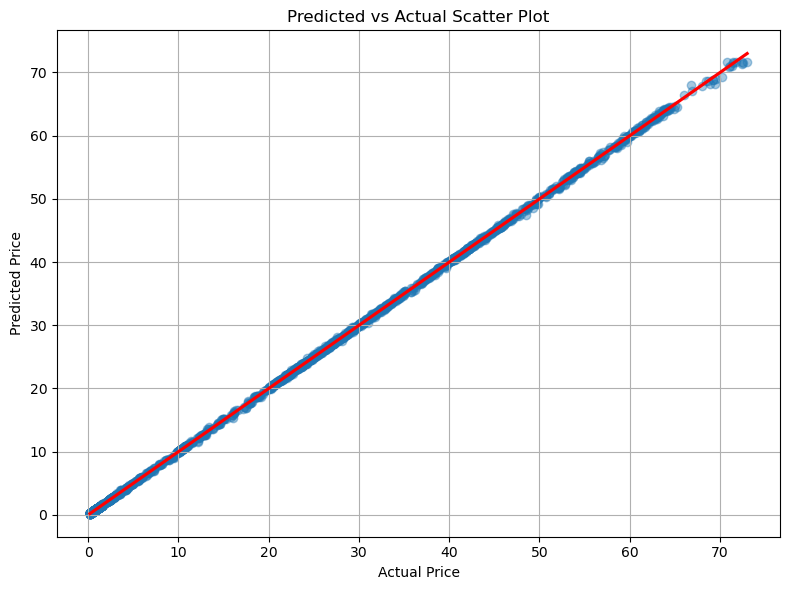

In [90]:

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4}, line_kws={"color":"red"})
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Scatter Plot')
plt.grid(True)
plt.tight_layout()
plt.show()


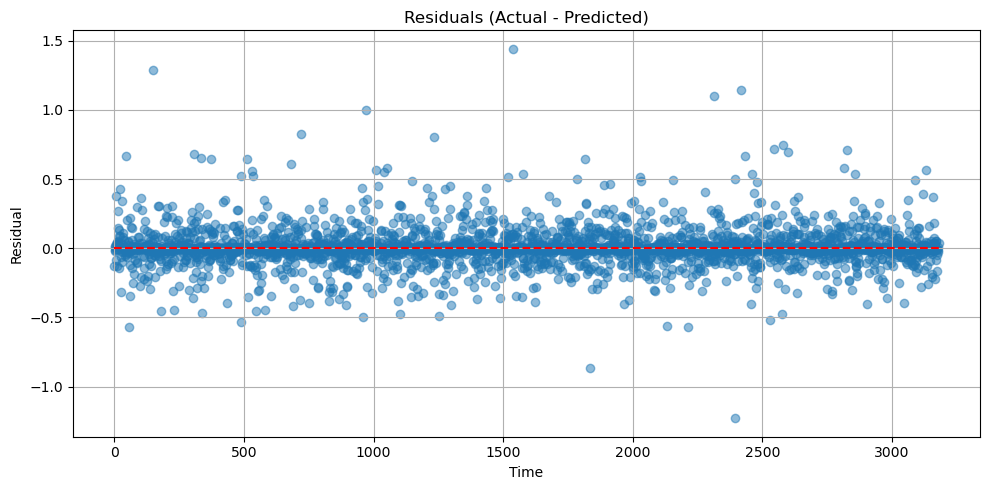

In [91]:

y_test_2 = np.ravel(y_test)
y_pred_2 = np.ravel(y_pred)
residuals = y_test_2 - y_pred_2

# Plotting the residuals
plt.figure(figsize=(10, 5))
plt.scatter(range(len(residuals)), residuals, alpha=0.5)
plt.hlines(0, xmin=0, xmax=len(residuals), colors='red', linestyles='--')
plt.title('Residuals (Actual - Predicted)')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.grid(True)
plt.tight_layout()
plt.show()


In [92]:
y_pred_series = pd.Series(y_pred_2, index=y_test.index, name='predicted')
y_pred_series


8192     10.750288
5796      1.302086
13382    42.970650
4008      0.743608
6339      2.971855
           ...    
15020    56.857857
6695      2.446295
1698      0.748761
13057    40.133316
7153      5.636299
Name: predicted, Length: 3180, dtype: float32

In [93]:
cola_stock_no_na.loc[y_test.index, 'actual'] = y_test
cola_stock_no_na.loc[y_test.index, 'predicted'] = y_pred_series

/var/folders/2k/9trrdq5j5956nnt1tjxbq3900000gn/T/ipykernel_46668/2382294338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cola_stock_no_na.loc[y_test.index, 'actual'] = y_test
/var/folders/2k/9trrdq5j5956nnt1tjxbq3900000gn/T/ipykernel_46668/2382294338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cola_stock_no_na.loc[y_test.index, 'predicted'] = y_pred_series


In [94]:
cola_stock_with_prediction = cola_stock_no_na

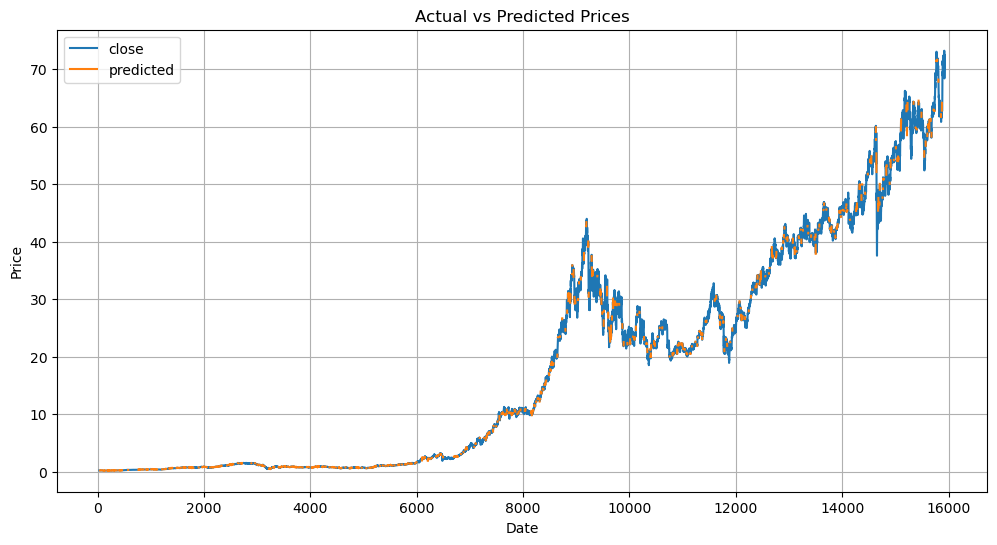

In [95]:
cola_stock_with_prediction[['close', 'predicted']].plot(figsize=(12,6), title='Actual vs Predicted Prices')
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# 2. Trend Classification

After finishing the price prediction now I am going to make trend classification using SVM

In [48]:
#first I will assign new dataframe so we will not use or alter the no NA dataframe so if we want to roll back the data we still can revert back to the old one 
cola_stock_classification = cola_stock_no_na

In [49]:
cola_stock_classification=cola_stock_classification.drop(['actual','predicted'],axis=1)

KeyError: "['actual', 'predicted'] not found in axis"

In [261]:
# Preparring features and labels for classification
cola_stock_classification['target']=(cola_stock_classification['returns'].shift(-1)>0).astype(int)

/var/folders/2k/9trrdq5j5956nnt1tjxbq3900000gn/T/ipykernel_61129/1783805383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cola_stock_classification['target']=(cola_stock_classification['returns'].shift(-1)>0).astype(int)


## RANDOM FOREST

In [262]:
cola_stock_classification=cola_stock_no_na

In [263]:
cola_stock_classification

,date,open,high,low,close,adj_close,volume,year,month,day,...,macd,macd_signal,macd_diff,bb_high,bb_low,bb_width,rolling_mean,rolling_std,z_price,target
33,1962-02-16,0.239583,0.244141,0.239583,0.239583,0.041939,1190400,1962,2,16,...,-0.002359,-0.002426,0.000067,0.251226,0.233051,0.018175,0.242139,0.004662,-0.548213,1
34,1962-02-19,0.241536,0.243490,0.241536,0.243490,0.042623,345600,1962,2,19,...,-0.002141,-0.002369,0.000228,0.250842,0.233110,0.017731,0.241976,0.004548,0.332901,0
35,1962-02-20,0.243490,0.244141,0.241536,0.242188,0.042395,460800,1962,2,20,...,-0.002049,-0.002305,0.000256,0.250872,0.233145,0.017728,0.242009,0.004547,0.039466,0
36,1962-02-21,0.242188,0.244141,0.240885,0.240885,0.042167,691200,1962,2,21,...,-0.002058,-0.002255,0.000198,0.250875,0.233338,0.017537,0.242106,0.004498,-0.271485,0
37,1962-02-23,0.240885,0.244141,0.238281,0.238281,0.041711,1036800,1962,2,23,...,-0.002249,-0.002254,0.000005,0.250805,0.233538,0.017267,0.242171,0.004429,-0.878373,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15925,2025-04-10,70.190002,71.209999,68.980003,70.760002,70.760002,22450200,2025,4,10,...,0.257689,0.430704,-0.173015,72.497756,67.566244,4.931512,70.032000,1.264906,0.575538,1
15926,2025-04-11,70.910004,71.849998,70.540001,71.430000,71.430000,19988200,2025,4,11,...,0.337937,0.412151,-0.074213,72.648943,67.642056,5.006887,70.145500,1.284239,1.000203,1
15927,2025-04-14,71.300003,72.660004,70.930000,72.449997,72.449997,13930200,2025,4,14,...,0.478326,0.425386,0.052940,72.959211,67.564788,5.394424,70.262000,1.383640,1.581334,0
15928,2025-04-15,72.620003,72.629997,71.720001,71.860001,71.860001,14965500,2025,4,15,...,0.535801,0.447469,0.088332,73.137106,67.634894,5.502212,70.386000,1.411288,1.044437,0


In [264]:
X = cola_stock_classification.drop(columns=['target','date','returns','bb_low','rolling_std','day','month','year','bb_high','Cumulative_Max'])
y = cola_stock_classification['target']

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [266]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_split=10,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=10, n_estimators=200, random_state=42)

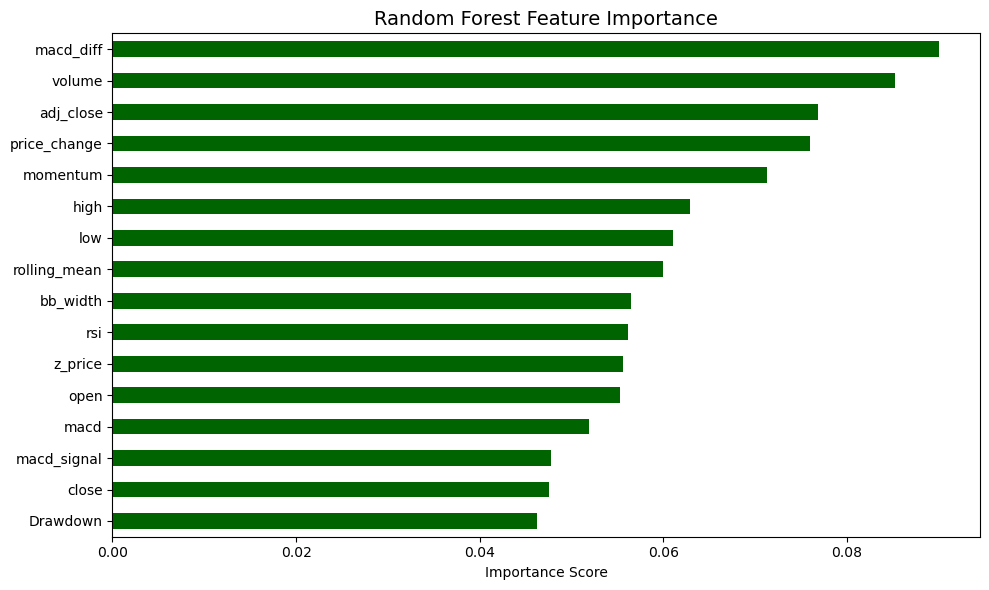

In [267]:
plt.figure(figsize=(10, 6))
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='darkgreen')
plt.title('Random Forest Feature Importance', fontsize=14)
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

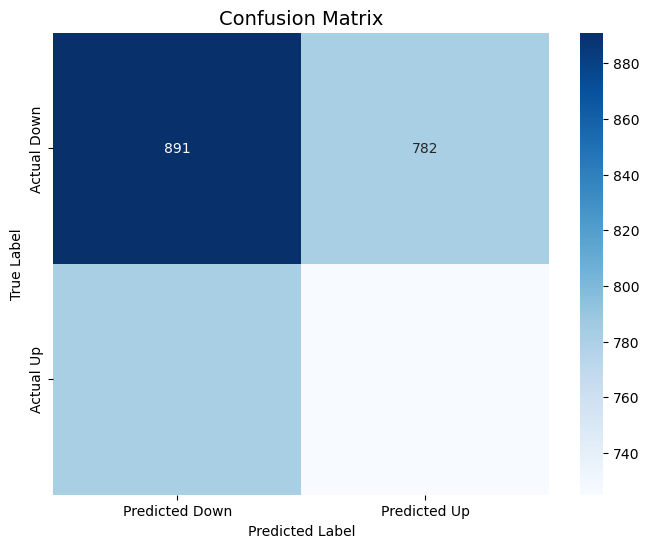

In [268]:
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]


plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Down', 'Predicted Up'],
            yticklabels=['Actual Down', 'Actual Up'])
plt.title('Confusion Matrix', fontsize=14)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [269]:
print("\nClassification Report (with 0/1 labels):")
print(classification_report(y_test, y_pred, target_names=['0', '1']))
# Or even simpler, just use:
print(classification_report(y_test, y_pred))


Classification Report (with 0/1 labels):
              precision    recall  f1-score   support

           0       0.53      0.53      0.53      1673
           1       0.48      0.48      0.48      1507

    accuracy                           0.51      3180
   macro avg       0.51      0.51      0.51      3180
weighted avg       0.51      0.51      0.51      3180

              precision    recall  f1-score   support

           0       0.53      0.53      0.53      1673
           1       0.48      0.48      0.48      1507

    accuracy                           0.51      3180
   macro avg       0.51      0.51      0.51      3180
weighted avg       0.51      0.51      0.51      3180



In [271]:
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability_Up': y_prob
})

results['Strategy_Returns'] = results['Actual'] * results['Predicted']  # Only count correct predictions

print("\nStrategy Performance:")
print(f"Hit Rate: {results[results['Predicted']==1]['Actual'].mean():.2%}")
print(f"Gain on Correct Ups: {results[results['Strategy_Returns']>0]['Strategy_Returns'].mean():.2%}")
print(f"Loss on Wrong Ups: {results[(results['Predicted']==1)&(results['Actual']==0)]['Strategy_Returns'].mean():.2%}")



Strategy Performance:
Hit Rate: 48.11%
Gain on Correct Ups: 100.00%
Loss on Wrong Ups: 0.00%


In [280]:
#tuning using randomsearchCV

# Since we are using randomsearch so right now we will put everything inside the parameter with Randint

parameter = {
    'n_estimators' :randint(50,250),
    'max_depth': randint(3,10),
    'min_samples_split':randint(10,30),
    'min_samples_leaf' : randint(5,20),
    'class_weight': [{0: w, 1: 1} for w in [1, 1.2, 1.5, 2]],
    'max_features': ['sqrt', 0.8, None]
}

tscv = TimeSeriesSplit(n_splits=3)

rf_model = RandomForestClassifier(random_state=42,n_jobs=5)

rm_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=parameter,
    n_iter=10,
    cv=tscv,
    scoring='f1',            # Focus on harmonic mean
    random_state=42,
    verbose=1
)

rm_search.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                   estimator=RandomForestClassifier(n_jobs=5, random_state=42),
                   param_distributions={'class_weight': [{0: 1, 1: 1},
                                                         {0: 1.2, 1: 1},
                                                         {0: 1.5, 1: 1},
                                                         {0: 2, 1: 1}],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x307fcef90>,
                                        'max_features': ['sqrt', 0.8, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x3075789d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x304bae810>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x3075d5190>},
                   random_state=42, scoring='f1', verbose=1)

In [281]:
print("Best parameters:", rm_search.best_params_)
print("Best F1-score:", rm_search.best_score_)

Best parameters: {'class_weight': {0: 1, 1: 1}, 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 14, 'min_samples_split': 28, 'n_estimators': 124}
Best F1-score: 0.514367514334137


Since the result is not improving we will re defining our target to reduce noises and create new feature engineering

In [274]:
treshold = 0.005
cola_stock_classification['target'] = (cola_stock_classification['adj_close'].pct_change().shift(-1)>treshold).astype(int)
print(cola_stock_classification['target'].value_counts(normalize=True))

target
0    0.67346
1    0.32654
Name: proportion, dtype: float64


/var/folders/2k/9trrdq5j5956nnt1tjxbq3900000gn/T/ipykernel_61129/3063067256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cola_stock_classification['target'] = (cola_stock_classification['adj_close'].pct_change().shift(-1)>treshold).astype(int)


In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_dist = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5,6,7,8],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'gamma': [0, 0.1],
    'scale_pos_weight': [1, 1.5]  # Adjust for class imbalance
}

xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric=['logloss', 'aucpr'],  # Better for imbalanced data
    early_stopping_rounds=20,
    n_estimators=500,  # Set high and let early stopping optimize
    random_state=100,
    n_jobs=-1
)


xgb_model.fit(
    X_train_split, y_train_split,
    eval_set = [(X_val,y_val)],
    verbose = 1    
)

[0]	validation_0-logloss:0.60070	validation_0-aucpr:0.29811
[1]	validation_0-logloss:0.60083	validation_0-aucpr:0.30921
[2]	validation_0-logloss:0.60041	validation_0-aucpr:0.31616
[3]	validation_0-logloss:0.60178	validation_0-aucpr:0.32811
[4]	validation_0-logloss:0.60219	validation_0-aucpr:0.31859
[5]	validation_0-logloss:0.60321	validation_0-aucpr:0.31603
[6]	validation_0-logloss:0.60344	validation_0-aucpr:0.31592
[7]	validation_0-logloss:0.60359	validation_0-aucpr:0.31470
[8]	validation_0-logloss:0.60425	validation_0-aucpr:0.30984
[9]	validation_0-logloss:0.60199	validation_0-aucpr:0.31200
[10]	validation_0-logloss:0.60201	validation_0-aucpr:0.31249
[11]	validation_0-logloss:0.60697	validation_0-aucpr:0.30869
[12]	validation_0-logloss:0.61040	validation_0-aucpr:0.30385
[13]	validation_0-logloss:0.62040	validation_0-aucpr:0.30273
[14]	validation_0-logloss:0.62141	validation_0-aucpr:0.30234
[15]	validation_0-logloss:0.62139	validation_0-aucpr:0.30234
[16]	validation_0-logloss:0.62130	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric=['logloss', 'aucpr'],
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=-1,
              num_parallel_tree=None, ...)

In [276]:
print(f"Best iteration: {xgb_model.best_iteration}")
print(f"Best score: {xgb_model.best_score}")

Best iteration: 3
Best score: 0.32811068753627937


<Figure size 1000x600 with 0 Axes>

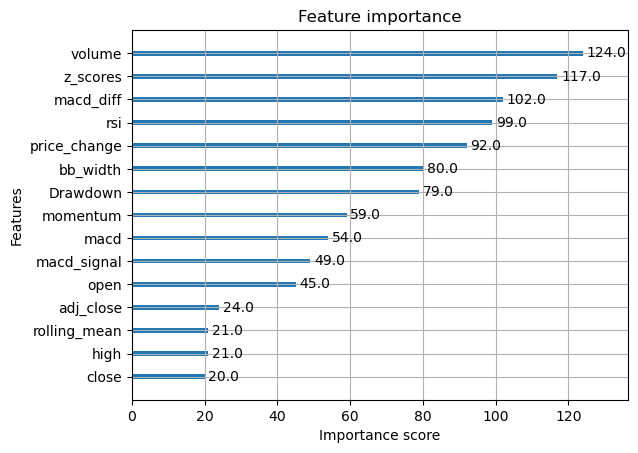

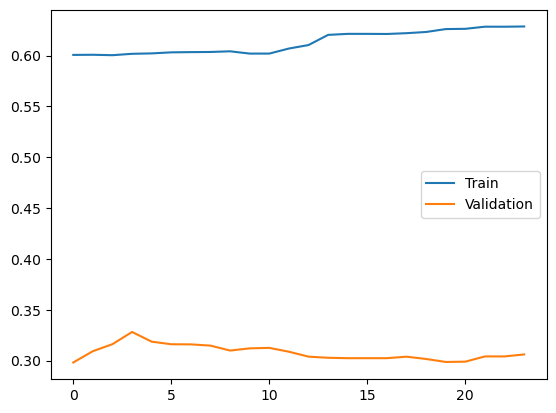

In [277]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=15)
plt.show()

# Plot training progress
results = xgb_model.evals_result()
plt.plot(results['validation_0']['logloss'], label='Train')
plt.plot(results['validation_0']['aucpr'], label='Validation')
plt.legend()
plt.show()

# Report 

# 3. Anomaly Detection

In [282]:
cola_anomaly = cola_stock

In [283]:
cola_anomaly

,date,open,high,low,close,adj_close,volume,year,month,day,...,rsi,macd,macd_signal,macd_diff,bb_high,bb_low,bb_width,rolling_mean,rolling_std,z_price
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.046041,806400,1962,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.263021,NaN,NaN
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.045016,1574400,1962,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260091,0.004144,-0.707107
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.045358,844800,1962,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.259766,0.002984,-0.218070
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.044332,1420800,1962,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258138,0.004066,-1.200942
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.043876,2035200,1962,1,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256641,0.004859,-1.232676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15925,2025-04-10,70.190002,71.209999,68.980003,70.760002,70.760002,22450200,2025,4,10,...,53.628481,0.257689,0.430704,-0.173015,72.497756,67.566244,4.931512,70.032000,1.264906,0.575538
15926,2025-04-11,70.910004,71.849998,70.540001,71.430000,71.430000,19988200,2025,4,11,...,56.083732,0.337937,0.412151,-0.074213,72.648943,67.642056,5.006887,70.145500,1.284239,1.000203
15927,2025-04-14,71.300003,72.660004,70.930000,72.449997,72.449997,13930200,2025,4,14,...,59.591471,0.478326,0.425386,0.052940,72.959211,67.564788,5.394424,70.262000,1.383640,1.581334
15928,2025-04-15,72.620003,72.629997,71.720001,71.860001,71.860001,14965500,2025,4,15,...,56.767025,0.535801,0.447469,0.088332,73.137106,67.634894,5.502212,70.386000,1.411288,1.044437


In [284]:
cola_anomaly['price_anomaly'] = cola_anomaly['z_price'].abs() > 3
cola_anomaly['z_volume'] = (
    (cola_anomaly['volume'] - cola_anomaly['volume'].rolling(20).mean()) / cola_anomaly['volume'].rolling(20).std()
)
cola_stock['volume_anomaly'] = cola_anomaly['z_volume'] > 3  # Only upper threshold

In [288]:
cola_anomaly.dtypes

date              datetime64[ns]
open                     float64
high                     float64
low                      float64
close                    float64
adj_close                float64
volume                     int64
year                       int32
month                      int32
day                        int32
returns                  float64
Cumulative_Max           float64
Drawdown                 float64
momentum                 float64
price_change             float64
rsi                      float64
macd                     float64
macd_signal              float64
macd_diff                float64
bb_high                  float64
bb_low                   float64
bb_width                 float64
rolling_mean             float64
rolling_std              float64
z_price                  float64
price_anomaly               bool
z_volume                 float64
volume_anomaly              bool
dtype: object

In [297]:
cola_anomaly.dropna()

,date,open,high,low,close,adj_close,volume,year,month,day,...,macd_diff,bb_high,bb_low,bb_width,rolling_mean,rolling_std,z_price,price_anomaly,z_volume,volume_anomaly
33,1962-02-16,0.239583,0.244141,0.239583,0.239583,0.041939,1190400,1962,2,16,...,0.000067,0.251226,0.233051,0.018175,0.242139,0.004662,-0.548213,False,0.309000,False
34,1962-02-19,0.241536,0.243490,0.241536,0.243490,0.042623,345600,1962,2,19,...,0.000228,0.250842,0.233110,0.017731,0.241976,0.004548,0.332901,False,-0.990754,False
35,1962-02-20,0.243490,0.244141,0.241536,0.242188,0.042395,460800,1962,2,20,...,0.000256,0.250872,0.233145,0.017728,0.242009,0.004547,0.039466,False,-0.771312,False
36,1962-02-21,0.242188,0.244141,0.240885,0.240885,0.042167,691200,1962,2,21,...,0.000198,0.250875,0.233338,0.017537,0.242106,0.004498,-0.271485,False,-0.325369,False
37,1962-02-23,0.240885,0.244141,0.238281,0.238281,0.041711,1036800,1962,2,23,...,0.000005,0.250805,0.233538,0.017267,0.242171,0.004429,-0.878373,False,0.440914,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15925,2025-04-10,70.190002,71.209999,68.980003,70.760002,70.760002,22450200,2025,4,10,...,-0.173015,72.497756,67.566244,4.931512,70.032000,1.264906,0.575538,False,0.258720,False
15926,2025-04-11,70.910004,71.849998,70.540001,71.430000,71.430000,19988200,2025,4,11,...,-0.074213,72.648943,67.642056,5.006887,70.145500,1.284239,1.000203,False,-0.048020,False
15927,2025-04-14,71.300003,72.660004,70.930000,72.449997,72.449997,13930200,2025,4,14,...,0.052940,72.959211,67.564788,5.394424,70.262000,1.383640,1.581334,False,-0.716255,False
15928,2025-04-15,72.620003,72.629997,71.720001,71.860001,71.860001,14965500,2025,4,15,...,0.088332,73.137106,67.634894,5.502212,70.386000,1.411288,1.044437,False,-0.619520,False


In [301]:
anomaly_features

,returns,volume,rsi,macd_diff,bb_width,z_price
33,0.000000,1190400,39.214981,0.000067,0.018175,-0.548213
34,0.016307,345600,46.796584,0.000228,0.017731,0.332901
35,-0.005348,460800,44.791604,0.000256,0.017728,0.039466
36,-0.005379,691200,42.814587,0.000198,0.017537,-0.271485
37,-0.010810,1036800,39.100298,0.000005,0.017267,-0.878373
...,...,...,...,...,...,...
15925,0.011580,22450200,53.628481,-0.173015,4.931512,0.575538
15926,0.009469,19988200,56.083732,-0.074213,5.006887,1.000203
15927,0.014280,13930200,59.591471,0.052940,5.394424,1.581334
15928,-0.008143,14965500,56.767025,0.088332,5.502212,1.044437


In [303]:
cola_anomaly = cola_anomaly.dropna()

In [304]:
cola_anomaly

,date,open,high,low,close,adj_close,volume,year,month,day,...,macd_diff,bb_high,bb_low,bb_width,rolling_mean,rolling_std,z_price,price_anomaly,z_volume,volume_anomaly
33,1962-02-16,0.239583,0.244141,0.239583,0.239583,0.041939,1190400,1962,2,16,...,0.000067,0.251226,0.233051,0.018175,0.242139,0.004662,-0.548213,False,0.309000,False
34,1962-02-19,0.241536,0.243490,0.241536,0.243490,0.042623,345600,1962,2,19,...,0.000228,0.250842,0.233110,0.017731,0.241976,0.004548,0.332901,False,-0.990754,False
35,1962-02-20,0.243490,0.244141,0.241536,0.242188,0.042395,460800,1962,2,20,...,0.000256,0.250872,0.233145,0.017728,0.242009,0.004547,0.039466,False,-0.771312,False
36,1962-02-21,0.242188,0.244141,0.240885,0.240885,0.042167,691200,1962,2,21,...,0.000198,0.250875,0.233338,0.017537,0.242106,0.004498,-0.271485,False,-0.325369,False
37,1962-02-23,0.240885,0.244141,0.238281,0.238281,0.041711,1036800,1962,2,23,...,0.000005,0.250805,0.233538,0.017267,0.242171,0.004429,-0.878373,False,0.440914,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15925,2025-04-10,70.190002,71.209999,68.980003,70.760002,70.760002,22450200,2025,4,10,...,-0.173015,72.497756,67.566244,4.931512,70.032000,1.264906,0.575538,False,0.258720,False
15926,2025-04-11,70.910004,71.849998,70.540001,71.430000,71.430000,19988200,2025,4,11,...,-0.074213,72.648943,67.642056,5.006887,70.145500,1.284239,1.000203,False,-0.048020,False
15927,2025-04-14,71.300003,72.660004,70.930000,72.449997,72.449997,13930200,2025,4,14,...,0.052940,72.959211,67.564788,5.394424,70.262000,1.383640,1.581334,False,-0.716255,False
15928,2025-04-15,72.620003,72.629997,71.720001,71.860001,71.860001,14965500,2025,4,15,...,0.088332,73.137106,67.634894,5.502212,70.386000,1.411288,1.044437,False,-0.619520,False


In [316]:
#isolation forest
anomaly_features = cola_anomaly[['returns','volume','rsi','macd_diff','bb_width','z_price']].dropna()

iso_forest = IsolationForest(
    contamination=0.001,
    random_state=42,
    n_estimators=100,
    max_samples='auto'
)

cola_anomaly['iso_anomaly'] = iso_forest.fit_predict(anomaly_features)

cola_anomaly['iso_anomaly'] = (cola_anomaly['iso_anomaly']==-1).astype(int)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/var/folders/2k/9trrdq5j5956nnt1tjxbq3900000gn/T/ipykernel_61129/31026004.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cola_anomaly['iso_anomaly'] = iso_forest.fit_predict(anomaly_features)
/var/folders/2k/9trrdq5j5956nnt1tjxbq3900000gn/T/ipykernel_61129/31026004.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cola_

In [322]:
cola_anomaly['final_anomaly'] = (
    cola_anomaly['price_anomaly']
)

def get_anomaly_reason(row):
    reasons = []
    if row['price_anomaly']:reasons.append("Price Spike")
    return ", ".join(reasons) if reasons else 'Normal'

cola_anomaly['anomaly_reason'] = cola_anomaly.apply(get_anomaly_reason, axis=1)

/var/folders/2k/9trrdq5j5956nnt1tjxbq3900000gn/T/ipykernel_61129/534280735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cola_anomaly['final_anomaly'] = (
/var/folders/2k/9trrdq5j5956nnt1tjxbq3900000gn/T/ipykernel_61129/534280735.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cola_anomaly['anomaly_reason'] = cola_anomaly.apply(get_anomaly_reason, axis=1)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


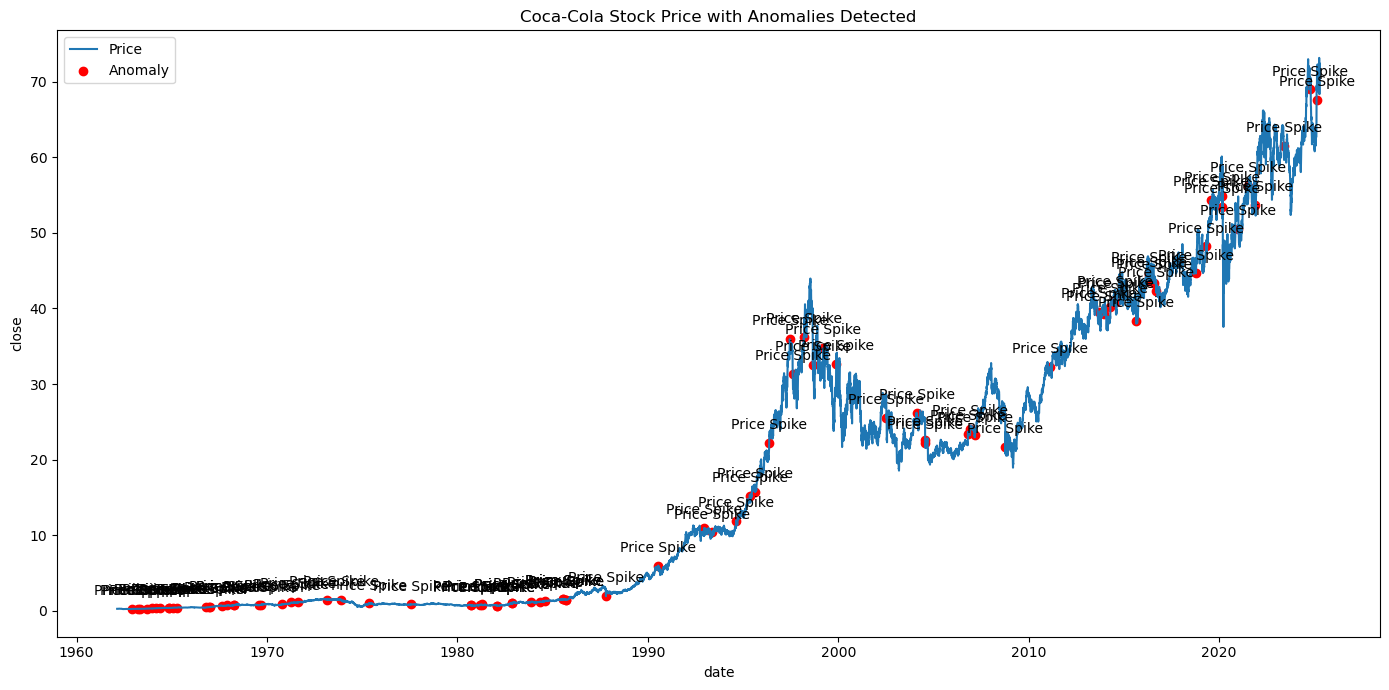

In [ ]:
plt.figure(figsize=(14, 7))

# Plot closing price
sns.lineplot(
    x='date', 
    y='close', 
    data=cola_anomaly,
    label='Price'
)

anomalies = cola_anomaly[cola_anomaly['final_anomaly'] == 1]
plt.scatter(
    anomalies['date'],
    anomalies['close'],
    color='red',
    label='Anomaly',
    zorder=1
)

for _, row in anomalies.iterrows():
    plt.annotate(
        row['anomaly_reason'],
        (row['date'], row['close']),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

plt.title('Coca-Cola Stock Price with Anomalies Detected')
plt.legend()
plt.tight_layout()
plt.show()

# Exporting CSV

df.to_csv('filename.csv', index=False)

In [416]:
predictions_df.to_csv('/Users/julius/Personal/Personal_Project/Coca_cola_Project/Analysis_of_Coca_Cola_Stock_Market/Dataset/clean_dataset/predictions.csv',index=False)
cola_anomaly.to_csv('/Users/julius/Personal/Personal_Project/Coca_cola_Project/Analysis_of_Coca_Cola_Stock_Market/Dataset/clean_dataset/anomaly.csv',index=False)
cola_stock_classification.to_csv('/Users/julius/Personal/Personal_Project/Coca_cola_Project/Analysis_of_Coca_Cola_Stock_Market/Dataset/clean_dataset/classification_cola.csv',index=False)


In [418]:
cola_stock.to_csv('/Users/julius/Personal/Personal_Project/Coca_cola_Project/Analysis_of_Coca_Cola_Stock_Market/Dataset/clean_dataset/cola_stock.csv')